In [2]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.labelsize']   = 20
plt.rcParams['axes.titlesize']   = 20
plt.rcParams['font.size']        = 10
plt.rcParams['legend.fontsize']  = 20
plt.rcParams.update({'figure.autolayout': True})
#import scienceplots
#plt.style.use(['science','ieee'])

from tqdm import tqdm
import random
import os
import time
import h5py
from datetime import datetime


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose

# Import auxiliary libraries

import auxLib; importlib.reload(auxLib)

Importing library...
Library successfully imported
Importing library...
Library successfully imported


<module 'auxLib' from 'd:\\Facultad\\Doctorado\\Proyectos\\paper\\auxLib.py'>

# Main variables

In [3]:
L = 40

densities = [0.55, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.7, 0.8, 0.9, 1.0]

densities_str = ['055','06', '061', '062', '063', '064', '065', '07', '08', '09','1']

neurons = 200

seed = 15

callbacks = auxLib.myCallback() # to be able to stop training if accuracy is high enough

In [4]:
training = ['para', 'ferro', 'neel','stripe']

modelsfolder, resultsfolder = auxLib.folders(directory=None, training=training, percolation=True)


In [71]:
data = auxLib.SyntheticImagesGen(training=training, L=L)

# Generate synthetic data

train_images, train_labels = data.dataGenerator(10000)
test_images, test_labels = data.dataGenerator(1000)

train_images = train_images.reshape((10000, L * L))
test_images = test_images.reshape((1000, L * L))

Generating synthetic data...
Done!
Elapsed time: 0.42650866508483887 seconds
Generating synthetic data...
Done!
Elapsed time: 0.0316462516784668 seconds


# Creating and training models

Now we should use the results of the critical temperatures of each training to decide what number of neurons will we use for percolation problem. We will use 200 neurons.

In [72]:
np.random.seed(seed)

kernel_regularizer=tf.keras.regularizers.l2(0.01)

dnn = auxLib.DenseNeuralNetworkGen() # Initializing. It generates the model

dnn.build_model((L*L,), num_classes=4, layers=[
{'type': 'dense', 'units': neurons, 'activation': 'relu', 'kernel_regularizer': kernel_regularizer},
{'type': 'dropout', 'rate': 0.2},
{'type': 'dense', 'units': 4, 'activation': 'softmax'} #2 is the number of classes: Paramagnetic and ferromagnetic
])

dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn.summary()

dnn.fit(train_images, train_labels, 
		epochs=50, batch_size=20,
		validation_data=(test_images, test_labels), 
		callbacks=[callbacks],
		verbose=False)

dnn.save_weights(f'dnn_n{neurons}_DO02', directory=modelsfolder) # name of the model (exclude the 'weights' and the extension)
dnn.save_model(f'dnn_n{neurons}_DO02', directory=modelsfolder)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               320200    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 804       
                                                                 
Total params: 321004 (1.22 MB)
Trainable params: 321004 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\All\models\2024-08-20\dnn_n200_DO02.h5


C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Predictions

In [73]:
# Simulated images

loader_init = auxLib.loader_and_saver(os.getcwd())


In [74]:

for densitiy_index, density in enumerate(densities):
    
    sim_images, temperature = loader_init.simulatedImages(densitiy_index)

    model_path = os.path.join(modelsfolder, f'dnn_n{neurons}_DO02.h5')

    dnn = keras.models.load_model(model_path)

    prediction = auxLib.predictor(L, dnn, sim_images, 
                                name=f'{densities_str[densitiy_index]}',
								training=training,
                                directory=resultsfolder, 
                                reshape = True, 
                                verbose=False, 
                                save_prediction=True)


Loading simulated images...


Loading arrays: 100%|██████████| 196/196 [00:03<00:00, 51.38array/s]


Files loaded!
Data of density p = 0.55 succesfully loaded.


Predicting: 100%|██████████| 195/195 [00:35<00:00,  5.56repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 150/150 [00:02<00:00, 62.26array/s]


Files loaded!
Data of density p = 0.6 succesfully loaded.


Predicting: 100%|██████████| 149/149 [00:13<00:00, 10.77repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 199/199 [00:02<00:00, 74.67array/s]


Files loaded!
Data of density p = 0.61 succesfully loaded.


Predicting: 100%|██████████| 198/198 [00:17<00:00, 11.20repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 187/187 [00:03<00:00, 60.79array/s]


Files loaded!
Data of density p = 0.62 succesfully loaded.


Predicting: 100%|██████████| 186/186 [00:16<00:00, 10.96repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 163/163 [00:02<00:00, 69.11array/s]


Files loaded!
Data of density p = 0.63 succesfully loaded.


Predicting: 100%|██████████| 162/162 [00:31<00:00,  5.10repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 142/142 [00:03<00:00, 36.69array/s]


Files loaded!
Data of density p = 0.64 succesfully loaded.


Predicting: 100%|██████████| 141/141 [00:18<00:00,  7.45repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 161/161 [00:03<00:00, 52.40array/s]


Files loaded!
Data of density p = 0.65 succesfully loaded.


Predicting: 100%|██████████| 160/160 [00:18<00:00,  8.49repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 151/151 [00:02<00:00, 59.97array/s]


Files loaded!
Data of density p = 0.7 succesfully loaded.


Predicting: 100%|██████████| 150/150 [00:13<00:00, 11.33repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 155/155 [00:02<00:00, 71.87array/s]


Files loaded!
Data of density p = 0.8 succesfully loaded.


Predicting: 100%|██████████| 154/154 [00:13<00:00, 11.38repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 139/139 [00:01<00:00, 79.85array/s]


Files loaded!
Data of density p = 0.9 succesfully loaded.


Predicting: 100%|██████████| 138/138 [00:13<00:00, 10.33repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 156/156 [00:02<00:00, 64.86array/s]


Files loaded!
Data of density p = 1. succesfully loaded.


Predicting: 100%|██████████| 155/155 [00:13<00:00, 11.12repetitions/s]


# Calculating critical temperature

Prediction for rho = 0.55
T_c = 0


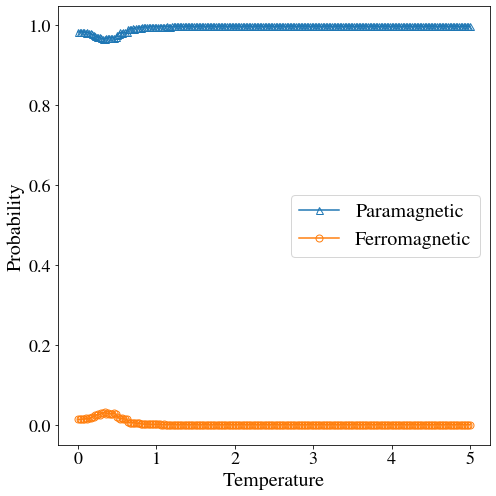

Prediction for rho = 0.6
T_c = 0


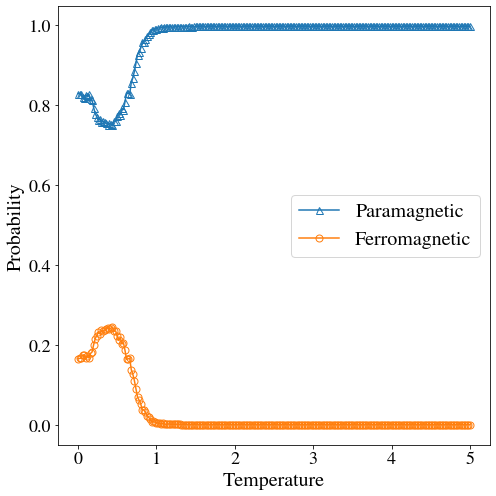

Prediction for rho = 0.61
T_c = 0


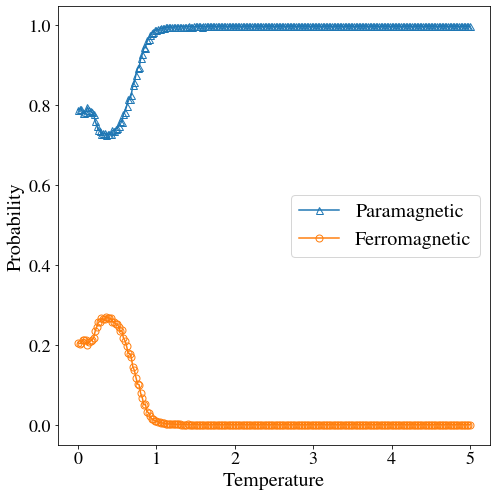

Prediction for rho = 0.62
T_c = 0


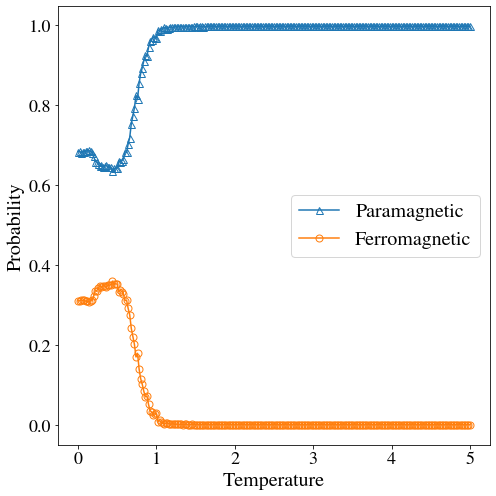

Prediction for rho = 0.63
T_c = 0


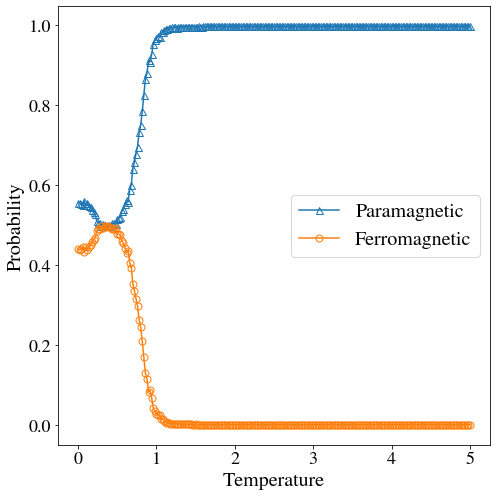

Prediction for rho = 0.64
T_c = 0.6637212575685875


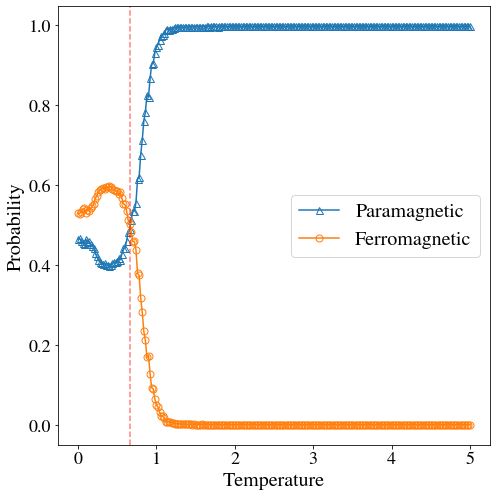

Prediction for rho = 0.65
T_c = 0.7702433430905783


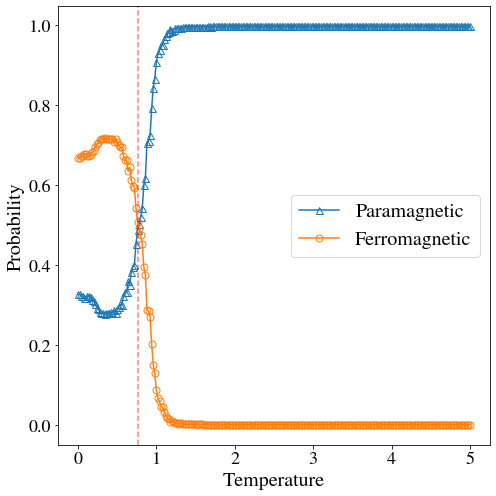

Prediction for rho = 0.7
T_c = 1.0889283301079884


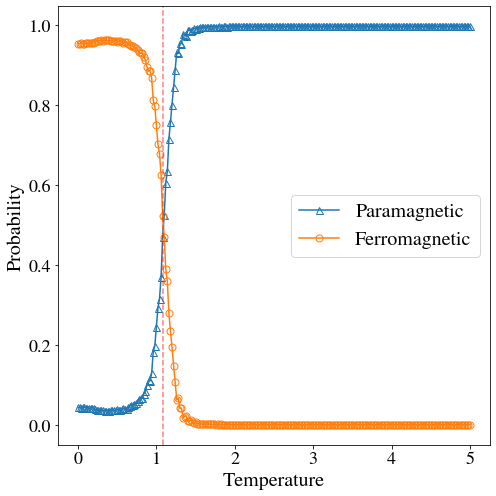

Prediction for rho = 0.8
T_c = 1.557312962911837


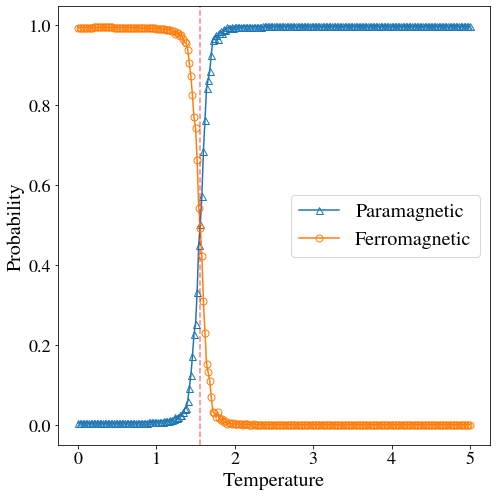

Prediction for rho = 0.9
T_c = 1.9426205749506313


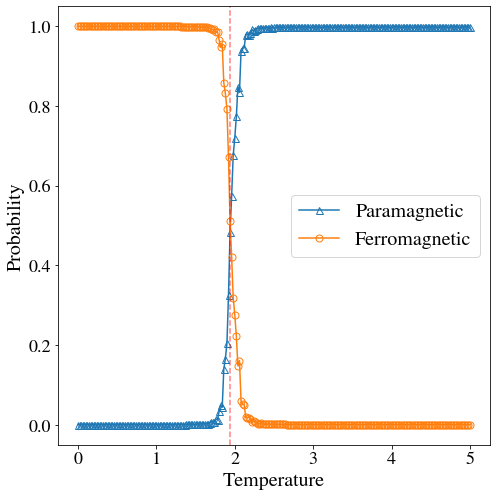

Prediction for rho = 1.0
T_c = 2.3133978990609547


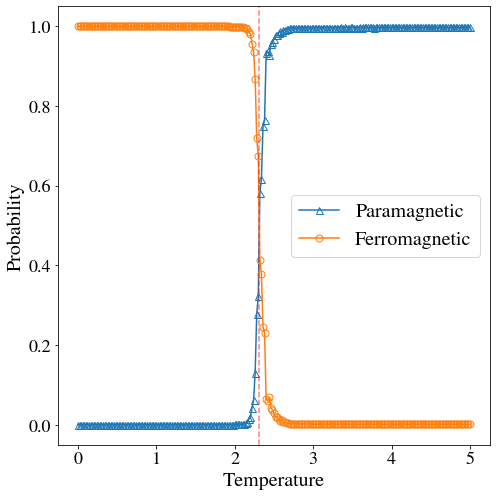

In [75]:
critical_temperatures = []

for density_index, density in enumerate(densities):
    prediction = pd.read_csv(resultsfolder+f'/predictions_{densities_str[density_index]}.csv', header=0).to_numpy(float)
    temperature, para, ferro, neel, stripe = prediction.T

    print(f'Prediction for rho = {density}')

    plt.figure(figsize=(7, 7))
    plt.plot(temperature, para, '^-', label='Paramagnetic', markerfacecolor='none', markersize=7)
    plt.plot(temperature, ferro, 'o-', label='Ferromagnetic', markerfacecolor='none', markersize=7)
    plt.xlabel('Temperature')
    plt.ylabel('Probability')
    plt.legend()

    if max(ferro)<0.5:
        tc = 0
    else:
        index_half = np.where(ferro > 0.5)[0][-1]
        if index_half == 250:
            index_half = 249
        # Interpolation:
        tc = temperature[index_half] + (ferro[index_half]-0.5)*(temperature[index_half+1] - temperature[index_half]) / (ferro[index_half] - ferro[index_half+1])
        plt.axvline(x=tc,  color = 'red', linestyle = '--', alpha = 0.5)

    critical_temperatures.append(tc)
    print(f'T_c = {tc}')
    plt.savefig(os.path.join(resultsfolder, f'critical_temperature_{densities_str[density_index]}.pdf'))
    plt.show()

# $T_c$ vs $\rho$

In [76]:
temp = pd.DataFrame((np.concatenate((np.array(densities).reshape(len(densities),1), 
                                    np.array(critical_temperatures).reshape(len(densities),1)),axis=1)), 
                                    columns=['Density','Temperature'])
temp.to_csv(os.path.join(resultsfolder, 'critical_temperatures_vs_density.csv'), index=False)

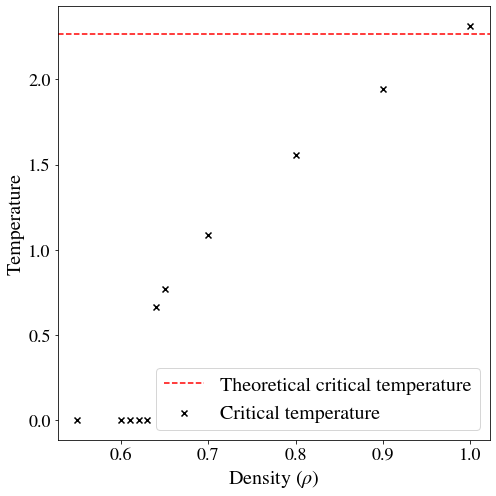

In [87]:
temp = pd.read_csv(os.path.join(resultsfolder, f'critical_temperatures_vs_density.csv'))

plt.figure(figsize=(7, 7))
plt.scatter(temp['Density'],temp['Temperature'], marker='x', color='black', label='Critical temperature')
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')
plt.xlabel(r'Density ($\rho$)')
plt.ylabel('Temperature')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.legend(loc='lower right')
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures_vs_density.pdf'))
plt.show()

Using the critical temperature scaled by the critical temperature at $\rho=1$ and comparing with the theoretical curve we get

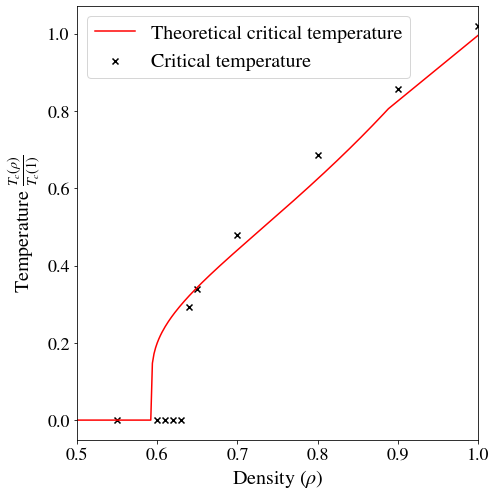

In [78]:
temp = pd.read_csv(os.path.join(resultsfolder, f'critical_temperatures_vs_density.csv'))

sim_density = np.arange(0.0,1.002,0.002)
theoretical_curve = sim_density*0
for i in range(len(sim_density)):
    if sim_density[i]<0.592746:
        theoretical_curve[i] = 0
    elif sim_density[i]<0.89:
        theoretical_curve[i] = -(0.983)/(np.log(sim_density[i]-0.592746))  
        last_i = i

for i in range(last_i, len(sim_density)):
     theoretical_curve[i] = theoretical_curve[last_i] + 1.7 * (sim_density[i]-sim_density[last_i])

plt.figure(figsize=(7, 7))
plt.scatter(temp['Density'],temp['Temperature']/2.269, marker='x', color='black', label='Critical temperature')#np.array(temp_df['Temperatura'])[-1],'x--')
plt.plot(sim_density, theoretical_curve,'r', label = 'Theoretical critical temperature')
plt.xlabel(r'Density ($\rho$)')
plt.ylabel(r'Temperature $\frac{T_c(\rho)}{T_c(1)}$')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.legend(loc='upper left')
plt.xlim(0.5,1)
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures_vs_density.pdf'))
plt.show()
